# Problem set 2: Descriptive economics

**Table of contents**<a id='toc0_'></a>    
- 1. [Basic pandas](#toc1_)    
  - 1.1. [Dataframe](#toc1_1_)    
  - 1.2. [New variable](#toc1_2_)    
  - 1.3. [Indexing](#toc1_3_)    
  - 1.4. [Changing variables](#toc1_4_)    
  - 1.5. [Dropping observations and columns](#toc1_5_)    
  - 1.6. [Renaming](#toc1_6_)    
  - 1.7. [Income distribution](#toc1_7_)    
- 2. [National account identity](#toc2_)    
  - 2.1. [Download](#toc2_1_)    
  - 2.2. [Merge](#toc2_2_)    
  - 2.3. [Split-apply-combine-plot](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [48]:
# Uncomment this to install the needed packages on your laptop. You can mark it all, and pres Cmd+Shift+7. 
# After you have installed this, you can comment it out again. You may need to restart your kernel after installation. Just press "Restart" in the toolbar above.

# %pip install git+https://github.com/alemartinello/dstapi
# %pip install fredapi

In [49]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

from dstapi import DstApi

## 1. <a id='toc1_'></a>[Basic pandas](#toc0_)

The first part of the exercises today can somewhat be found in the 05_06_DescriptivEconomics -> 01_Bacics.ipynb

### 1.1. <a id='toc1_1_'></a>[Dataframe](#toc0_)

Modify the code below such that *income* and *consumption* are variables in the *df* DataFrame. The variables are generated randomly through a RNG with N entries.  Assume that consumption is $consumption = \sqrt{income}$. 

The idea is to add/change the entries of the dictionary instead of creating new variables. This keeps the data collected in a single placeholder

In [50]:
np.random.seed(1999) # Set the random seed so that we all get the same results
 
N = 100
mydata = {} # Here we create an empty dictionary
mydata['id'] = range(N) # We create a variable 'id' with values 0,1,...,N-1. Think of this as N persons
mydata['income'] = np.exp(np.random.normal(size=N)) 
mydata['consumption'] = np.sqrt(mydata['income'])

df = pd.DataFrame(mydata)
df.head()

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


In [51]:
display(df)

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712
...,...,...,...
95,95,0.201856,0.449284
96,96,2.368034,1.538842
97,97,2.389874,1.545922
98,98,1.488635,1.220096


### 1.2. <a id='toc1_2_'></a>[New variable](#toc0_)

Create a new variable *ratio* which is the ratio of consumption to income. Remember, try to use indexing on your current dataset *df* instead of creating a new variable

In [52]:
df['ratio'] = df['consumption'] / df['income']
df.head()

,id,income,consumption,ratio
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


### 1.3. <a id='toc1_3_'></a>[Indexing](#toc0_)

**Question a:** Select everybody: with an income above 1.

Create a constraint and then apply it to your dataset. Then use the .loc in pandas to locate places, where the contraint, should hold

In [53]:
I = df['income'] > 1
df.loc[I, :].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Question b:** Select everybody with an income *above* 1 and a ratio *above* 0.7. 

Remember to put brackets around each constraint and use & to apply both constraint

In [54]:
I = (df['income'] > 1) & (df['ratio'] > 0.7)
df.loc[I].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


### 1.4. <a id='toc1_4_'></a>[Changing variables](#toc0_)

**Question a:** Set consumption equal to 0.5 if income is less than 0.5.

Locate the places where the the contraints holds and the set it equal to 0.5. What is the mean? 

In [55]:
I = (df['income'] < 0.5)
df.loc[I, ['consumption']] = 0.5
df['consumption'].mean()


1.075479712048503

**Question b:** Set consumption equal to income if income is less than 0.5.

Create a constraint. Use indexing of the variables to locate it, and then change the values using .values

Does the mean of consumption change? Why is that? 

In [56]:
I = (df['income'] < 0.5)
df.loc[I, ['consumption']] = df.loc[I, ['income']].values
df['consumption'].mean()

1.0337728690050054

### 1.5. <a id='toc1_5_'></a>[Dropping observations and columns](#toc0_)

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

You can find help in 05_06_DescriptiveEconomics -> 03_From_Excel


*(NB: Do you see the use of f_strings?!?!?!?)*

In [57]:
df_alt = df.copy()

print(f'before: {df.shape[0]} observations, {df.shape[1]} variables')
df = df.drop('ratio',axis=1)
I = df['income'] > 1.5
df = df.drop(df[I].index)
df = df.drop(df.loc[:5].index)
print(f'after: {df.shape[0]} observations, {df.shape[1]} variables')

# # alternative: keep where I is false
# del df_alt['ratio']
# I = df_alt['income'] > 1.5
# df_alt = df_alt[~I]
# df_alt = df_alt.iloc[5:,:]
# print(f'after (alt): {df_alt.shape[0]} observations, {df_alt.shape[1]} variables')

before: 100 observations, 4 variables
after: 65 observations, 3 variables


### 1.6. <a id='toc1_6_'></a>[Renaming](#toc0_)

Rename *consumption* to *cons* and *income* to *inc*.

Use data.rename(columns=('old name' : 'new name',...))

In [58]:
df = df.rename(columns={'income':'inc','consumption':'con'})
df.head()

,id,inc,con
8,8,0.582074,0.762938
10,10,0.932044,0.965424
12,12,0.356952,0.356952
13,13,0.379825,0.379825
16,16,0.700896,0.837195


In [59]:
N = 100
mydata = {}
mydata['id'] = range(N)
mydata['income'] = np.exp(np.random.normal(size=N))
mydata['consumption'] = np.sqrt(mydata['income'])

df_true = pd.DataFrame(mydata)

df_true = df_true.rename(columns={'income':'inc','consumption':'con'})
df_true.head()

,id,inc,con
0,0,0.599145,0.774044
1,1,0.469167,0.684957
2,2,1.435292,1.198037
3,3,2.504716,1.582629
4,4,0.156667,0.395811


### 1.7. <a id='toc1_7_'></a>[Income distribution](#toc0_)

Compute the share of income for each decile of the income distribution using the code below as a starting point.

I can not find this in the lectures. So try for yourselves, but otherwise look at the solution. But make sure, you discuss, what the code does!

In [60]:
# deciles = df.quantile(?)
# df[?] = pd.cut(?,labels=?)
# income_shares df.groupby(?)[?].? / ?
# display(income_shares)

## 2. <a id='toc2_'></a>[National account identity](#toc0_)

This part will work with the API direct from Statistics Denmark. The data tables we will use are NAH1 and BEFOLK. 

Before going through these, try to look these up on the Statistics Denmark site. See what variables you can get etc. Do they match with the variables, columns and units  below?

### 2.1. <a id='toc2_1_'></a>[Download](#toc0_)

Consider the following dictionary definitions:

The A2_1 covers the 2.1 part in this notebook

In [ ]:
columns_dict = {} # Initialize an empty dictionary for the columns
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {} # Initialize an empty dictionary for the units
unit_dict['2020-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [ ]:
# hint, nah1_api = DstApi('?') 
# hint, params = nah1_api._define_base_params(language='en')
# display(params)
# nah1 = nah1_api.get_data(?)

,variable,unit,year,value
1970,M,real,1966,116721.0
1964,X,real,1966,129917.0
1955,I,nominal,1966,21134.0
1954,I,real,1966,137948.0
1945,G,nominal,1966,14768.0
...,...,...,...,...
2662,C,real,2024,1704543.0
2647,Y,nominal,2024,5326389.0
2646,Y,real,2024,4552586.0
2664,G,real,2024,597071.0


**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [ ]:
# hint, nah1_true = nah1_true.rename(?)

# for key,value in var_dict.items():
#   nah1.variable.replace(?)

#for key,value in unit_dict.items():
#   nah1.unit.replace(?)

,variable,unit,year,value,population
698,I,nominal,2024,679226.0,5961249.0
699,I,real,2024,584627.0,5961249.0
700,G,nominal,2024,672154.0,5961249.0
701,C,nominal,2024,1947969.0,5961249.0
702,M,nominal,2024,1778459.0,5961249.0
703,C,real,2024,1704543.0,5961249.0
704,Y,nominal,2024,5326389.0,5961249.0
705,Y,real,2024,4552586.0,5961249.0
706,G,real,2024,597071.0,5961249.0
707,M,real,2024,1424070.0,5961249.0


**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [ ]:
# write you code here
# nah1.value = nah1.value.astype('float')

,variable,unit,value,population,population_alt
year,,,,,
1990,M,real,325632.0,5135409.0,5135409.0
1987,C,nominal,566960.0,5124794.0,5124794.0
2015,G,real,573044.0,5659715.0,5659715.0
2011,G,nominal,491424.0,5560628.0,5560628.0
2008,G,real,524911.0,5475791.0,5475791.0
2001,X,real,780497.0,5349212.0,5349212.0
1967,M,real,124897.0,NaN,NaN
1995,X,nominal,380037.0,5215718.0,5215718.0
2004,X,nominal,662123.0,5397640.0,5397640.0


**Step 4:** Discuss what the following summary statistics show.

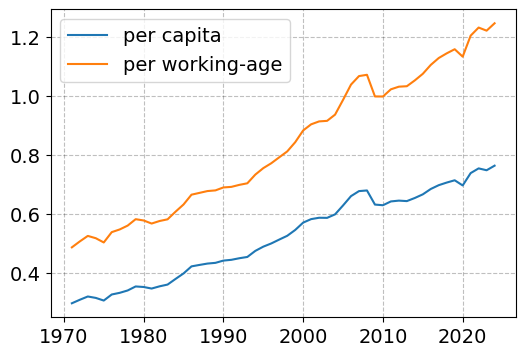

In [ ]:
# nah1.groupby(['variable','unit']).describe()

**Step 5:** Sort the dataset by year

In [ ]:
# nah1 = nah1.sort_values(by='?')
# nah1.head()

### 2.2. <a id='toc2_2_'></a>[Merge](#toc0_)

Load population data from Denmark Statistics:

In [67]:
BEFOLK1_api = DstApi('BEFOLK1')
params = BEFOLK1_api._define_base_params(language='en')
display(params)

{'table': 'befolk1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'CIVILSTAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [68]:
for code in ['KØN','CIVILSTAND']:
    print(code)
    display(BEFOLK1_api.variable_levels(code,language='en'))
    print('')

KØN


,id,text
0,TOT,I alt
1,1,Mænd
2,2,Kvinder



CIVILSTAND


,id,text
0,TOT,I alt
1,U,Ugift
2,G,Gift/separeret
3,E,Enke/enkemand
4,F,Fraskilt


In [69]:
params['variables'][0]['values'] = ['TOT'] 
params['variables'][2]['values'] = ['TOT'] 
BEFOLK1 = BEFOLK1_api.get_data(params=params)
display(BEFOLK1.head())

,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Total,"Age, total",Total,1972,4975653
1,Total,0 years,Total,1972,74461
2,Total,1 year,Total,1972,70323
3,Total,10 years,Total,1972,74854
4,Total,11 years,Total,1972,74624


In [70]:
BEFOLK1 = BEFOLK1.rename(columns={'TID':'year','INDHOLD':'population'})
BEFOLK1 = BEFOLK1.drop(columns=['KØN','CIVILSTAND'])
pop = BEFOLK1[BEFOLK1.ALDER == 'Age, total'].drop(columns=['ALDER'])
pop.head()

,year,population
0,1972,4975653
101,2008,5475791
202,1973,5007538
303,1975,5054410
404,1993,5180614


**Question a:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [71]:
# hint, merged = pd.merge(?,?,how='?',on=[?])
# merged_true.tail(10)

**Question b:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [72]:
# pop_with_index = pop.set_index(?)
# pop_with_index = pop_with_index.rename(columns={'population':'population_alt'})
# merged_with_index = merged.set_index(?)
# merged_alt = merged_with_index.join(?)
# merged_alt.tail(10)

**Question c:** Plot GDP per capita and GDP per working-age (18-65) using the code below as a starting point.

In [73]:
# ages = ?

# working_pop = BEFOLK1[BEFOLK1.ALDER.isin(?)].groupby('year').?
# working_pop = working_pop.drop(columns=['ALDER'])
# working_pop = working_pop.rename(columns={'population':'working_population'})

# merged = pd.merge(nah1, working_pop, how='left', on=['year'])
# merged = pd.merge(merged, pop, how='left', on=['year'])

### 2.3. <a id='toc2_3_'></a>[Split-apply-combine-plot](#toc0_)

Ensure the following code for a **split-apply-combine-plot** can run.

In [74]:
# # a. split
# nah1_true_grouped = nah1_true.groupby(['variable','unit'])
# nah1_true_grouped_first = nah1_true_grouped.value.first()
# nah1_true_grouped_first.name = 'first'

# # b. apply
# nah1_true = nah1_true.set_index(['variable','unit','year'])
# nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
# nah1_true = nah1_true.reset_index()

# # c. combine
# nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# # d. plot
# def plot(df,variable='indexed'):
#     df_indexed = df.set_index('year')
#     I = df_indexed.unit == 'real'
#     df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
# plot(nah1_true)

**Question:** Implement the same split-apply-combine as above using `transform`.

In [75]:
def first(x): # select the first element in a series
    return x.iloc[0]

# nah1_alt = nah1.copy()
# grouped = nah1_alt.groupby(?)
#nah1_alt[?] = ?.transform(lambda x: ?)
#nah1_alt.head()

In [76]:
# plot(nah1_alt,variable='index_transform')